In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql import functions as F
from pyspark.sql.functions import col, countDistinct
from pyspark.sql.functions import split, explode, trim, col, lit
from pyspark.sql.functions import to_date, current_date
import numpy as np


In [0]:
display(dbutils.fs.ls("dbfs:/FileStore/tables/"))


path name size modificationTime dbfs:/FileStore/tables/Imdb_Movie_Dataset-1.csv Imdb_Movie_Dataset-1.csv 392283051 1746727569000 dbfs:/FileStore/tables/Imdb_Movie_Dataset.csv Imdb_Movie_Dataset.csv 392283051 1746726676000

In [0]:
# File location and type
file_location = "/FileStore/tables/Imdb_Movie_Dataset-1.csv"
file_type = "csv"

# CSV options
infer_schema = "true"
first_row_is_header = "true"
delimiter = ","

# The applied options are for CSV files. For other file types, these will be ignored.
# quote <-- Important to handle commas correctly
df = (
    spark.read.format(file_type)
    .option("inferSchema", infer_schema)
    .option("header", first_row_is_header)
    .option("sep", delimiter)
    .option("quote", '"')
    .option("escape", '"')
    .load(file_location)
)

display(df)

id title vote_average vote_count status release_date revenue runtime adult budget imdb_id original_language original_title overview popularity tagline genres production_companies production_countries spoken_languages keywords 27205 Inception 8.364 34495 Released 7/15/2010 825532764 148 false 160000000 tt1375666 en Inception Cobb, a skilled thief who commits corporate espionage by infiltrating the subconscious of his targets is offered a chance to regain his old life as payment for a task considered to be impossible: "inception", the implantation of another person's idea into a target's subconscious. 83.952 Your mind is the scene of the crime. Action, Science Fiction, Adventure Legendary Pictures, Syncopy, Warner Bros. Pictures United Kingdom, United States of America English, French, Japanese, Swahili rescue, mission, dream, airplane, paris, france, virtual reality, kidnapping, philosophy, spy, allegory, manipulation, car crash, heist, memory, architecture, los angeles, california, dream world, subconscious 157336 Interstellar 8.417 32571 Released 11/5/2014 701729206 169 false 165000000 tt0816692 en Interstellar The adventures of a group of explorers who make use of a newly discovered wormhole to surpass the limitations on human space travel and conquer the vast distances involved in an interstellar voyage. 140.241 Mankind was born on Earth. It was never meant to die here. Adventure, Drama, Science Fiction Legendary Pictures, Syncopy, Lynda Obst Productions United Kingdom, United States of America English rescue, future, spacecraft, race against time, artificial intelligence (a.i.), nasa, time warp, dystopia, expedition, space travel, wormhole, famine, black hole, quantum mechanics, family relationships, space, robot, astronaut, scientist, single father, farmer, space station, curious, space adventure, time paradox, thoughtful, time-manipulation, father daughter relationship, 2060s, cornfield, time manipulation, complicated 155 The Dark Knight 8.512 30619 Released 7/16/2008 1004558444 152 false 185000000 tt0468569 en The Dark Knight Batman raises the stakes in his war on crime. With the help of Lt. Jim Gordon and District Attorney Harvey Dent, Batman sets out to dismantle the remaining criminal organizations that plague the streets. The partnership proves to be effective, but they soon find themselves prey to a reign of chaos unleashed by a rising criminal mastermind known to the terrified citizens of Gotham as the Joker. 130.643 Welcome to a world without rules. Drama, Action, Crime, Thriller DC Comics, Legendary Pictures, Syncopy, Isobel Griffiths, Warner Bros. Pictures United Kingdom, United States of America English, Mandarin joker, sadism, chaos, secret identity, crime fighter, superhero, anti hero, scarecrow, based on comic, vigilante, organized crime, tragic hero, anti villain, criminal mastermind, district attorney, super power, super villain, neo-noir 19995 Avatar 7.573 29815 Released 12/15/2009 2923706026 162 false 237000000 tt0499549 en Avatar In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization. 79.932 Enter the world of Pandora. Action, Adventure, Fantasy, Science Fiction Dune Entertainment, Lightstorm Entertainment, 20th Century Fox, Ingenious Media United States of America, United Kingdom English, Spanish future, society, culture clash, space travel, space war, space colony, tribe, romance, alien, futuristic, space, alien planet, marine, soldier, battle, love affair, nature, anti war, power relations, joyful 24428 The Avengers 7.71 29166 Released 4/25/2012 1518815515 143 false 220000000 tt0848228 en The Avengers When an unexpected enemy emerges and threatens global safety and security, Nick Fury, director of the international peacekeeping agency known as S.H.I.E.L.D., finds himself in need of a team to pull the world back from the brink of disaster. Spanning the globe, a daring recruitment ef

In [0]:
df = spark.read.option("header", "true").option("inferSchema", "true").csv("/FileStore/tables/Imdb_Movie_Dataset-1.csv")

df.show(5)

+------+---------------+------------+----------+--------+------------+----------+-------+-----+---------+---------+-----------------+---------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|    id|          title|vote_average|vote_count|  status|release_date|   revenue|runtime|adult|   budget|  imdb_id|original_language| original_title|            overview|          popularity|             tagline|              genres|production_companies|production_countries|    spoken_languages|            keywords|
+------+---------------+------------+----------+--------+------------+----------+-------+-----+---------+---------+-----------------+---------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
| 27205|      Inception|       8.364|     3449

🎯 Project Objective

Can we predict the box office revenue of a movie before it is released?
This project explores that question by building a machine learning regression model using Apache Spark MLlib to predict the revenue of a movie based on features such as budget, genre, popularity, vote average, and more.


#EDA

Can we predict the box office revenue of a movie before it is released?
This project explores that question by building a machine learning regression model using Apache Spark MLlib to predict the revenue of a movie based on features such as budget, genre, popularity, vote average, and more.


In [0]:
df.printSchema()


root
 |-- id: integer (nullable = true)
 |-- title: string (nullable = true)
 |-- vote_average: double (nullable = true)
 |-- vote_count: integer (nullable = true)
 |-- status: string (nullable = true)
 |-- release_date: string (nullable = true)
 |-- revenue: long (nullable = true)
 |-- runtime: integer (nullable = true)
 |-- adult: boolean (nullable = true)
 |-- budget: integer (nullable = true)
 |-- imdb_id: string (nullable = true)
 |-- original_language: string (nullable = true)
 |-- original_title: string (nullable = true)
 |-- overview: string (nullable = true)
 |-- popularity: double (nullable = true)
 |-- tagline: string (nullable = true)
 |-- genres: string (nullable = true)
 |-- production_companies: string (nullable = true)
 |-- production_countries: string (nullable = true)
 |-- spoken_languages: string (nullable = true)
 |-- keywords: string (nullable = true)



In [0]:
# Function to calculate missing values by column
def missing_values_table_spark(df):
    # Calculate the total missing values for each column
    mis_val = df.select([F.sum(F.col(c).isNull().cast("int")).alias(c) for c in df.columns])

    # Convert to Pandas for easier handling
    mis_val_pd = mis_val.toPandas().transpose()

    # Calculate the percentage of missing values for each column
    mis_val_percent = (mis_val_pd[0] / df.count()) * 100

    # Create a new table combining count and percentage
    mis_val_table = pd.concat([mis_val_pd, mis_val_percent], axis=1)

    # Rename the columns
    mis_val_table.columns = ['Missing Values', '% of Total Values']

    # Sort the table by percentage of missing values (descending order)
    mis_val_table = mis_val_table[mis_val_table['% of Total Values'] > 0].sort_values('% of Total Values', ascending=False).round(1)

    # Print some summary information
    print(f"Your selected dataframe has {len(df.columns)} columns.\n"
          f"There are {mis_val_table.shape[0]} columns that have missing values.")

    # Return the dataframe with missing information
    return mis_val_table

# Use the function
missing_values = missing_values_table_spark(df)

# Show the result
display(missing_values)


Your selected dataframe has 21 columns.
There are 11 columns that have missing values.


Missing Values % of Total Values 895847 85.4 755953 72.1 568428 54.2 487595 46.5 463497 44.2 440662 42.0 414972 39.6 215824 20.6 181817 17.3 13 0.0 13 0.0

These colums are the ones that have lots of missing values so we'll have to address them in the later section of pre-processing and data cleaning.

tagline: 85.4 %

keywords: 72.1 %

production_companies: 54.2%

imdb_id: 46.5%

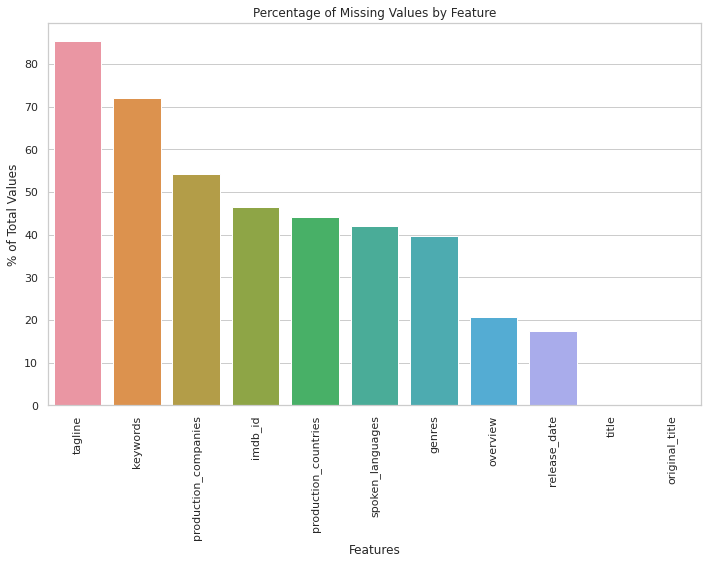

In [0]:
def plot_missing_values(mis_val_table, title):
    plt.figure(figsize=(10, 8))
    
    # Create a bar plot for the percentage of missing values
    sns.barplot(x=mis_val_table.index, 
                y=mis_val_table['% of Total Values'])
    
    # Rotate the x labels for better readability
    plt.xticks(rotation=90)
    
    # Set plot labels and title
    plt.title(title)
    plt.xlabel('Features')
    plt.ylabel('% of Total Values')
    
    # Display the plot
    plt.tight_layout()
    plt.show()

# Call the function to plot the missing values
plot_missing_values(missing_values,title= 'Percentage of Missing Values by Feature')

In [0]:
def zero_values_table_spark(df):
    # For each column, count how many values equal zero
    zero_counts = df.select([F.sum(F.when(F.col(c) == 0, 1).otherwise(0)).alias(c) for c in df.columns])

    # Convert result to Pandas for easier manipulation
    zero_counts_pd = zero_counts.toPandas().transpose()

    # Compute percentage
    row_count = df.count()
    zero_percent = (zero_counts_pd[0] / row_count) * 100

    # Create summary table
    zero_table = pd.concat([zero_counts_pd, zero_percent], axis=1)
    zero_table.columns = ['Zero Values', '% of Total Values']

    # Filter out columns with no zeros
    zero_table = zero_table[zero_table['Zero Values'] > 0].sort_values('% of Total Values', ascending=False).round(1)

    print(f"Your selected dataframe has {len(df.columns)} columns.\n"
          f"There are {zero_table.shape[0]} columns that have zero values.")

    return zero_table

zero_values = zero_values_table_spark(df)
display(zero_values)

Your selected dataframe has 21 columns.
There are 12 columns that have zero values.


Zero Values % of Total Values 1027899 98.0 991807 94.6 951555 90.7 697950 66.6 697613 66.5 293833 28.0 137908 13.2 43 0.0 43 0.0 8 0.0 6 0.0 4 0.0

##Check if ID and IMDB_ID are unique

In [0]:
total_rows = df.count()

# Count distinct IDs
unique_id = df.select(countDistinct("id")).collect()[0][0]
unique_imdb_id = df.select(countDistinct("imdb_id")).collect()[0][0]

# Calculate duplicated counts
duplicated_id = total_rows - unique_id
duplicated_imdb_id = total_rows - unique_imdb_id

# Print results
print(f"Total duplicated IDs: {duplicated_id}")
print(f"Total duplicated IMDB IDs: {duplicated_imdb_id}")

Total duplicated IDs: 794
Total duplicated IMDB IDs: 489255


##Genre Analysis

In [0]:
# Step 1: Split comma-separated string into an array
df_split = df.withColumn("genre", split(col("genres"), ","))

# Step 2: Explode the array to separate rows
df_exploded = df_split.withColumn("genre", explode(col("genre")))

# Step 3: Clean up whitespace (optional but helpful)
df_clean = df_exploded.withColumn("genre", trim(col("genre")))

# Step 4: Group by genre and count
genre_counts = df_clean.groupBy("genre").count().orderBy("count", ascending=False)

# Step 5: Show or display
display(genre_counts)

genre count Drama 212383 Documentary 147757 Comedy 132107 Animation 52775 Horror 50804 Romance 50471 Music 45047 Thriller 45005 Action 42584 Crime 32005 Family 26390 TV Movie 22637 Adventure 22502 Fantasy 21594 Science Fiction 20324 Mystery 19110 History 15442 War 9834 Western 8333

##Vote_Average and Vote_count analysis

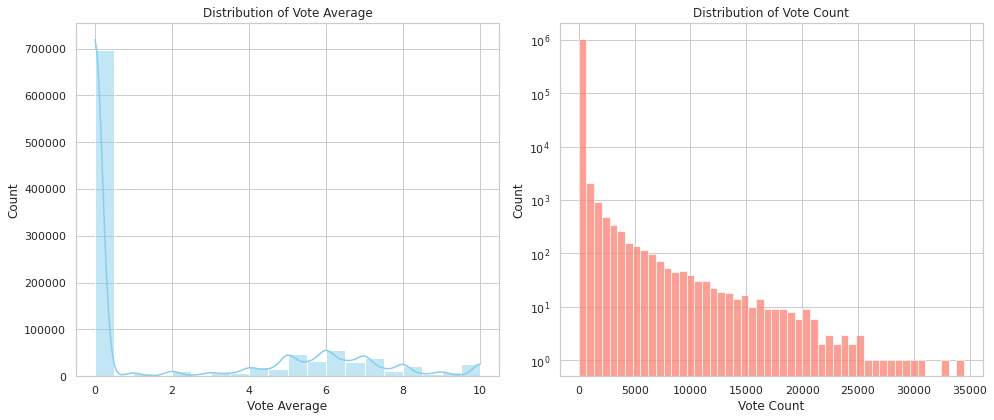

In [0]:
# Convert only the needed columns to Pandas to avoid memory issues
df_plot = df.select("vote_average", "vote_count").dropna().toPandas()

# Set seaborn style
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot vote_average histogram
sns.histplot(df_plot['vote_average'], bins=20, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of Vote Average')
axes[0].set_xlabel('Vote Average')
axes[0].set_ylabel('Count')

# Plot vote_count histogram (log scale)
sns.histplot(df_plot['vote_count'], bins=50, kde=False, ax=axes[1], color='salmon')
axes[1].set_title('Distribution of Vote Count')
axes[1].set_xlabel('Vote Count')
axes[1].set_ylabel('Count')
axes[1].set_yscale('log')  # log scale for better readability of skewed data

plt.tight_layout()
plt.show()

There's a huge spike at 0, suggesting many entries have a vote_average of 0 — likely movies with no actual ratings. The rest of the distribution looks bimodal, with a bump around 6–7, which aligns with typical average ratings on platforms like IMDb or TMDB.

There's a long tail of movies with thousands of votes, likely the popular ones.

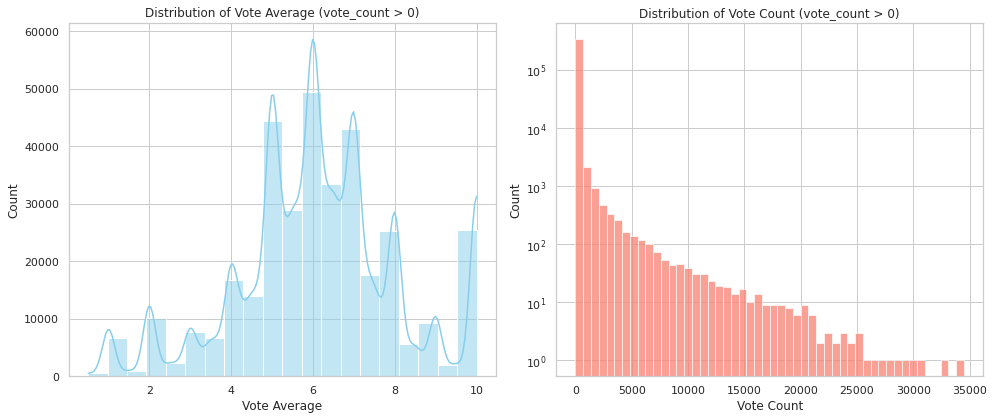

In [0]:
# Filter the Spark DataFrame using PySpark syntax
df_filtered = df.filter((col("vote_count") > 0) & (col("vote_average") > 0))

# Convert only needed columns to Pandas
df_plot = df_filtered.select("vote_average", "vote_count").toPandas()

# Set seaborn style
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Histogram for vote_average
sns.histplot(df_plot['vote_average'], bins=20, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of Vote Average (vote_count > 0)')
axes[0].set_xlabel('Vote Average')
axes[0].set_ylabel('Count')

# Histogram for vote_count (log scale)
sns.histplot(df_plot['vote_count'], bins=50, kde=False, ax=axes[1], color='salmon')
axes[1].set_title('Distribution of Vote Count (vote_count > 0)')
axes[1].set_xlabel('Vote Count')
axes[1].set_ylabel('Count')
axes[1].set_yscale('log')  # Optional: use log scale for skewed data

plt.tight_layout()
plt.show()

The rest of the distribution looks bimodal, with a bump around 6–7, which aligns with typical average ratings on platforms like IMDb or TMDB.

##Revenue and Budget analysis

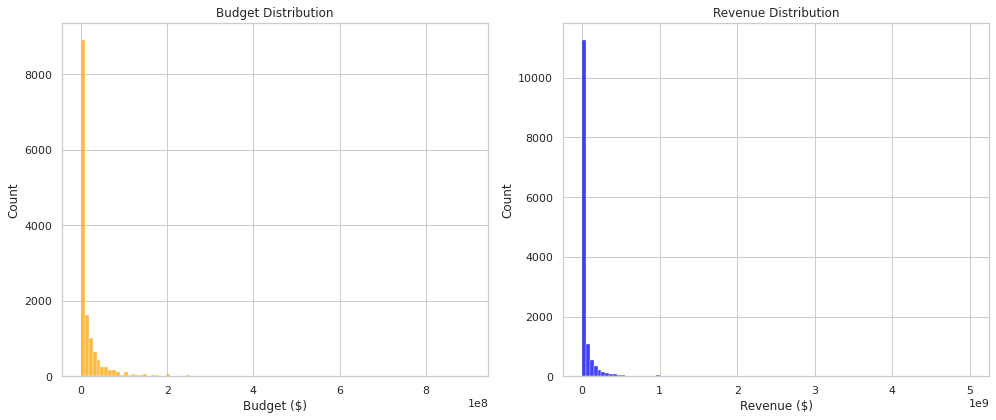

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql.functions import col

# Filter using PySpark syntax
df_money = df.filter((col("budget") > 0) & (col("revenue") > 0))

# Select and convert necessary columns to Pandas
df_money_pd = df_money.select("budget", "revenue").toPandas()

# Plot original distributions
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.set(style="whitegrid")

# Budget distribution
sns.histplot(df_money_pd['budget'], bins=100, ax=axes[0], color='orange')
axes[0].set_title('Budget Distribution')
axes[0].set_xlabel('Budget ($)')
axes[0].set_ylabel('Count')

# Revenue distribution
sns.histplot(df_money_pd['revenue'], bins=100, ax=axes[1], color='blue')
axes[1].set_title('Revenue Distribution')
axes[1].set_xlabel('Revenue ($)')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()


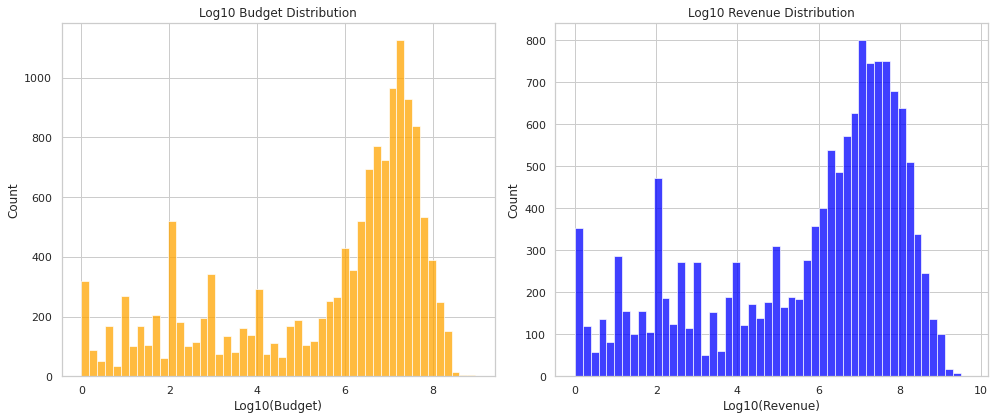

In [0]:
# Step 1: Filter Spark DataFrame for positive budget and revenue
df_money = df.filter((col("budget") > 0) & (col("revenue") > 0))

# Step 2: Convert to Pandas
df_money_pd = df_money.select("budget", "revenue").toPandas()

# Step 3: Apply log10 transformation
df_money_pd['log_budget'] = np.log10(df_money_pd['budget'])
df_money_pd['log_revenue'] = np.log10(df_money_pd['revenue'])

# Step 4: Plot
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.histplot(df_money_pd['log_budget'], bins=50, ax=axes[0], color='orange')
axes[0].set_title('Log10 Budget Distribution')
axes[0].set_xlabel('Log10(Budget)')

sns.histplot(df_money_pd['log_revenue'], bins=50, ax=axes[1], color='blue')
axes[1].set_title('Log10 Revenue Distribution')
axes[1].set_xlabel('Log10(Revenue)')

plt.tight_layout()
plt.show()

###Create Profit and ROI to enhance our analysis

In [0]:
# Filter out rows with zero or null budget or revenue to avoid division errors
df_money = df.filter((col("budget") > 0) & (col("revenue") > 0))

# Create 'profit' and 'roi' columns
df_money = df_money.withColumn("profit", col("revenue") - col("budget"))
df_money = df_money.withColumn("roi", col("revenue") / col("budget"))

In [0]:
# Describe the statistics for 'profit' and 'roi' columns in PySpark
df_money.describe(['profit', 'roi']).show()


+-------+--------------------+--------------------+
|summary|              profit|                 roi|
+-------+--------------------+--------------------+
|  count|               14165|               14165|
|   mean|3.4643377595552415E7|  361102.07822910196|
| stddev|1.3546438856865352E8|1.5581518627174256E7|
|    min|          -899999984|4.444444444444444E-9|
|    max|          4999999899|               1.0E9|
+-------+--------------------+--------------------+



###Check only de ROI > 0

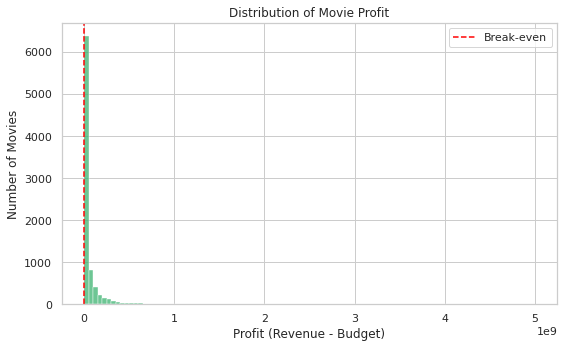

In [0]:
# Step 1: Calculate profit and ROI
df_money = df.withColumn("profit", col("revenue") - col("budget"))
df_money = df_money.withColumn("roi", col("revenue") / col("budget"))

# Step 2: Filter for positive profit and ROI
profit_roi_filtered = df_money.filter((col('profit') > 0) & (col('roi') > 0))

# Step 3: Convert to pandas DataFrame for plotting
profit_roi_filtered_pd = profit_roi_filtered.select('profit').toPandas()

# Step 4: Plot the distribution of profit
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(profit_roi_filtered_pd['profit'], bins=100, color='mediumseagreen')
plt.title('Distribution of Movie Profit')
plt.xlabel('Profit (Revenue - Budget)')
plt.ylabel('Number of Movies')
plt.axvline(0, color='red', linestyle='--', label='Break-even')
plt.legend()
plt.tight_layout()
plt.show()

###Movies with the highest profit

In [0]:
# Step 1: Sort by profit in descending order and get the top 10 movies
top_profit = profit_roi_filtered.orderBy(col('profit'), ascending=False).limit(10)

# Step 2: Select the relevant columns (title, revenue, budget, profit)
top_profit_selected = top_profit.select('title', 'revenue', 'budget', 'profit')

# Step 3: Convert to pandas DataFrame to display in a table
top_profit_selected_pd = top_profit_selected.toPandas()

# Step 4: Display the result
print(top_profit_selected_pd)

                          title     revenue     budget      profit
0             babben: the movie  4999999999        100  4999999899
1                     Bee Movie  2930000000  150000000  2780000000
2             TikTok Rizz Party  3000000000  250000000  2750000000
3                        Avatar  2923706026  237000000  2686706026
4             Avengers: Endgame  2800000000  356000000  2444000000
5       Adventures in Bora Bora  3000000000  800000000  2200000000
6                       Titanic  2264162353  200000000  2064162353
7                   Best Of Joy  2000000000       1000  1999999000
8      Avatar: The Way of Water  2320250281  460000000  1860250281
9  Star Wars: The Force Awakens  2068223624  245000000  1823223624


###Movies with the highest ROI

In [0]:
# Step 1: Sort by ROI in descending order and get the top 10 movies
top_roi = profit_roi_filtered.orderBy(col('roi'), ascending=False).limit(10)

# Step 2: Select the relevant columns (title, budget, revenue, roi)
top_roi_selected = top_roi.select('title', 'budget', 'revenue', 'roi')

# Step 3: Convert to pandas DataFrame to display in a table
top_roi_selected_pd = top_roi_selected.toPandas()

# Step 4: Display the result
print(top_roi_selected_pd)


                              title  budget     revenue           roi
0  GEESE - THE MONEY TALKS TOUR '24       1  1000000000  1.000000e+09
1                ירידתם של המגניבים       1  1000000000  1.000000e+09
2             Pouring Out The Heart       1  1000000000  1.000000e+09
3                     Lil Detective       2   999999999  5.000000e+08
4                   חברים על סמים 1       5  1000000000  2.000000e+08
5                              דילן       5  1000000000  2.000000e+08
6                   חברים על סמים 2       5  1000000000  2.000000e+08
7                Żyraf: Czas Zemsty       1   100004215  1.000042e+08
8                         The Light       1   100000000  1.000000e+08
9                            ¡Slap!       1   100000000  1.000000e+08


##Runtime Analysis

In [0]:
df.select("runtime").describe().show()


+-------+------------------+
|summary|           runtime|
+-------+------------------+
|  count|           1048575|
|   mean| 48.22609636888158|
| stddev|60.578225122617994|
|    min|               -28|
|    max|             14400|
+-------+------------------+



###Movies with negative Runtime

In [0]:
# Filter movies with negative runtime
filmes_runtime_negativo = df.filter(col('runtime') < 0)

# Count and show results
print(f"Movies with negative Runtime: {filmes_runtime_negativo.count()}")
filmes_runtime_negativo.select('title', 'runtime').show(truncate=False)

Movies with negative Runtime: 1
+-----------------+-------+
|title            |runtime|
+-----------------+-------+
|An Eye For An Eye|-28    |
+-----------------+-------+



###Movies with 0 seconds of Runtime

In [0]:
# Filter for movies with runtime == 0
outliers_runtime = df.filter(col('runtime') == 0)

# Display the count
print(f"Movies with 0 runtime: {outliers_runtime.count()}")


Movies with 0 runtime: 293833


It may be interesting see some extreme runtimes, so we decided to check for some outliers.

In [0]:
# Step 1: Calculate Q1 and Q3 using approxQuantile
q1, q3 = df.approxQuantile("runtime", [0.25, 0.75], 0.01)
iqr = q3 - q1

# Step 2: Calculate bounds
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Step 3: Identify outliers
outliers_runtime = df.filter((col("runtime") < lower_bound) | (col("runtime") > upper_bound))
df_no_outliers = df.filter((col("runtime") >= lower_bound) & (col("runtime") <= upper_bound))

# Step 4: Display the number of outliers
print(f"Movies with outlier runtime values: {outliers_runtime.count()}")


Movies with outlier runtime values: 8254


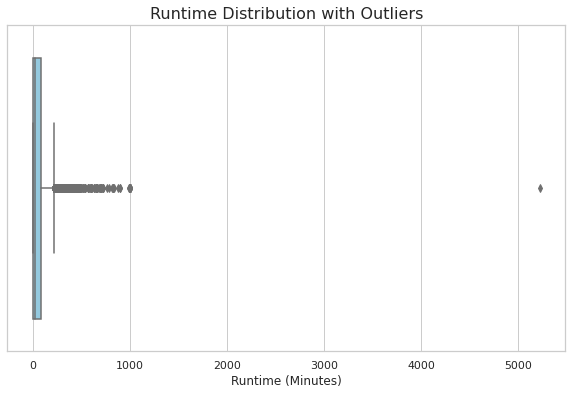

In [0]:
# Sample a reasonable amount of data to avoid memory issues
runtime_pd = df.select("runtime").dropna().sample(fraction=0.1, seed=42).toPandas()

plt.figure(figsize=(10, 6))
sns.boxplot(x=runtime_pd['runtime'], color='skyblue')

plt.title("Runtime Distribution with Outliers", fontsize=16)
plt.xlabel("Runtime (Minutes)", fontsize=12)

plt.show()

Without Outliers:

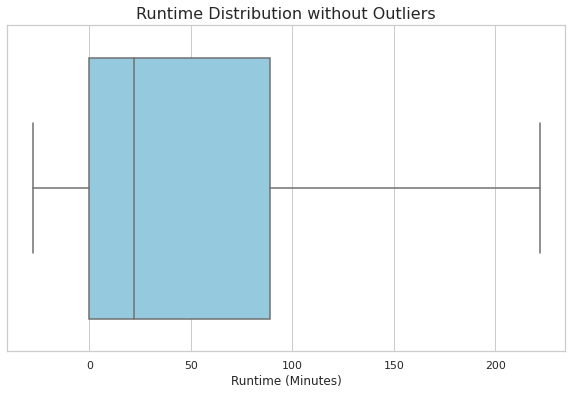

In [0]:
# Convert to pandas DataFrame
df_no_outliers_pd = df_no_outliers.select("runtime").toPandas()

plt.figure(figsize=(10, 6))
sns.boxplot(x=df_no_outliers_pd['runtime'], color='skyblue')

plt.title("Runtime Distribution without Outliers", fontsize=16)
plt.xlabel("Runtime (Minutes)", fontsize=12)

plt.show()

##Popularity Analysis

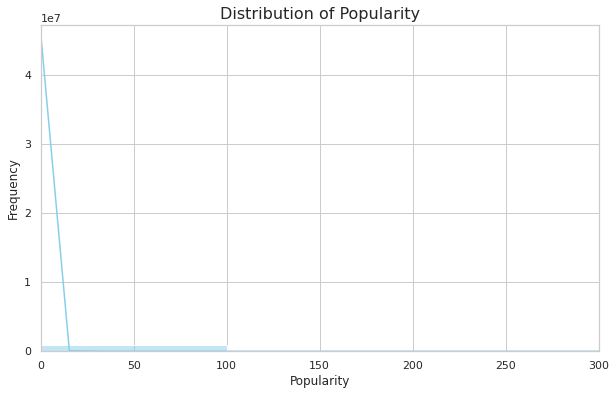

In [0]:
# Filter Spark DataFrame
pop_filtered = df.filter(df['popularity'] > 0)

# Convert to Pandas
pop_filtered_pd = pop_filtered.select('popularity').toPandas()

# Plot
plt.figure(figsize=(10, 6))
sns.histplot(pop_filtered_pd['popularity'], kde=True, color='skyblue', bins=30)

plt.xlim(0, 300)
plt.title("Distribution of Popularity", fontsize=16)
plt.xlabel("Popularity", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

plt.show()


##Correlation Matrix for Popularity, Vote_Count and Revenue

In [0]:
# Convert to pandas for correlation analysis
df_pd = df.select('popularity', 'vote_count', 'revenue').toPandas()

# Compute correlation matrix
correlation_popularity = df_pd.corr()

# Display the correlation matrix
print("Correlation between Popularity, Vote Count, and Revenue:")
print(correlation_popularity)


Correlation between Popularity, Vote Count, and Revenue:
            popularity  vote_count   revenue
popularity    1.000000    0.254086  0.217021
vote_count    0.254086    1.000000  0.667021
revenue       0.217021    0.667021  1.000000


Vote count appears to have the strongest relationship with revenue.

Both popularity and vote count are positively correlated with revenue, but the relationship with popularity is weaker compared to the relationship between vote count and revenue.

##Relase Date Analysis

In [0]:
# Count the number of rows where release_date is null
invalid_release_dates_count = df.filter(col('release_date').isNull()).count()

print(f"Number of invalid or missing release dates: {invalid_release_dates_count}")

Number of invalid or missing release dates: 1046605


In [0]:


# Check for future release dates (dates beyond today)
future_dates_count = df.filter(col('release_date') > current_date()).count()

# Check for far-past release dates (before 1888) - The first movie was made in 1888 according to Google
far_past_dates_count = df.filter(col('release_date') < lit('1888-01-01')).count()

print(f"Number of future dates: {future_dates_count}")
print(f"Number of old dates (before 1888): {far_past_dates_count}")

Number of future dates: 0
Number of old dates (before 1900): 47
